# Movie Success Prediction and Analysis Using TMDb Data

# 1. Introduction

This project aims to predict movie ratings and revenue using regression techniques, leveraging a comprehensive dataset from The Movie Database (TMDb). By exploring various features such as budget, genres, popularity, and more, we seek to uncover trends and key factors that contribute to a film's success. Through data analysis and machine learning, this notebook provides insights into the dynamics of the movie industry and builds predictive models to estimate a movie's performance.

Installation packages for my project

In [ ]:
%pip install kaggle
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn



In [ ]:
%pip install scikit-learn

## Imports

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# 2. Data Collection

The data is obtained through Kaggle datasets. A zip file was then extracted and the csv files were read into pandas dataframes.

In [96]:
!kaggle datasets list -s "movie"

ref                                                             title                                            size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
danielgrijalvas/movies                                          Movie Industry                                 433664  2021-07-23 19:48:26.173000          57280        455  1.0              
tmdb/tmdb-movie-metadata                                        TMDB 5000 Movie Dataset                       9317430  2017-09-28 01:09:12.897000         434140       4010  0.8235294        
jrobischon/wikipedia-movie-plots                                Wikipedia Movie Plots                        31376869  2018-10-15 19:59:54.650000          28883        505  0.88235295       
shivamb/netflix-shows                        

In [97]:
!kaggle datasets download tmdb/tmdb-movie-metadata

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
tmdb-movie-metadata.zip: Skipping, found more recently modified local copy (use --force to force download)


 Unzip the file to access contents and list files

In [98]:
with zipfile.ZipFile("tmdb-movie-metadata.zip", "r") as zip_ref:
    zip_ref.extractall("tmdb_movie_data")

List files in the extracted folder

In [99]:
os.listdir("tmdb_movie_data")

['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']

Read CSV files into pandas dataframe

In [100]:
path = "tmdb_movie_data/tmdb_5000_movies.csv"
movies = pd.read_csv(path)
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [101]:
path2 = "tmdb_movie_data/tmdb_5000_credits.csv"
credits = pd.read_csv(path2)
credits.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


# 3. Data Exploration and Cleaning
We will start with the movies dataframe and begin to explore the data 

# 3.2 Initial Data Descriptions

In [102]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [103]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [104]:
movies.shape
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns")

There are 4803 rows and 20 columns


In [105]:
movies.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Batman,Two brothers share a house in LA's Fairfax dis...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


Generate the statistical analysis for the popularity and vote average and vote count


In [106]:
movies[['popularity','vote_average','vote_count']].describe()

,popularity,vote_average,vote_count
count,4803.000000,4803.000000,4803.000000
mean,21.492301,6.092172,690.217989
std,31.816650,1.194612,1234.585891
min,0.000000,0.000000,0.000000
25%,4.668070,5.600000,54.000000
50%,12.921594,6.200000,235.000000
75%,28.313505,6.800000,737.000000
max,875.581305,10.000000,13752.000000


In [107]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

# 3.2 Missing Values
Check for missing values and show their count



In [108]:
def nullColumns(data):  
    nulls = data.isnull().sum()
    return nulls[nulls != 0]

print(nullColumns(movies)) 
print(nullColumns(credits)) #credits has no null values

homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64
Series([], dtype: int64)


Looking at what rows have a null overview

In [109]:
movies[movies['overview'].isnull()]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


We can see that their vote counts are all very low and they all have multiple missing values. These movies will have a neglible effect on data analysis and so we will remove these rows from our dataset.

In [110]:
movies = movies.dropna(subset= 'overview', axis = 0)

In [111]:
print(nullColumns(movies))

homepage        3088
release_date       1
tagline          841
dtype: int64


This has also coincidentally removed the missing values of runtime as two of the records also had their runtime as null

In [112]:
movies[movies['release_date'].isnull()]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


It is also safe to remove this record as it no effect on the dataset due to it's 0 popularity 

In [113]:
movies = movies.dropna(subset= 'release_date', axis = 0)


We can leave the homepage as missing values as we will not need these columns and will probably remove them from the dataset as this column doesn't have an effect on film popularity.

However, having a tagline could have an effect on the popularity of a film and so we will keep this column but leave the missing values as is. We cannot replace these with anything as there is no statistical inference to be made from the other tagline values to replace the missing values.

In [114]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

# 3.3 Further data explorations

Check the data types of the data


In [115]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Check for duplicate values

In [116]:
movies.duplicated().sum() 

np.int64(0)

Check for the number of unique values in each column


In [117]:
movies.nunique()

budget                   434
genres                  1175
homepage                1691
id                      4799
keywords                4220
original_language         37
original_title          4797
overview                4799
popularity              4798
production_companies    3695
production_countries     469
release_date            3278
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4796
vote_average              71
vote_count              1609
dtype: int64

# 3.4 Categorical data 

Value counts for columns with categorical data

Value counts for 'genres':
genres
[{"id": 18, "name": "Drama"}]                                                                    369
[{"id": 35, "name": "Comedy"}]                                                                   282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                  164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                 144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                      142
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]    109
[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                    88
[{"id": 99, "name": "Documentary"}]                                                               66
[{"id": 27, "name": "Horror"}]                                                                    64
[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thrille

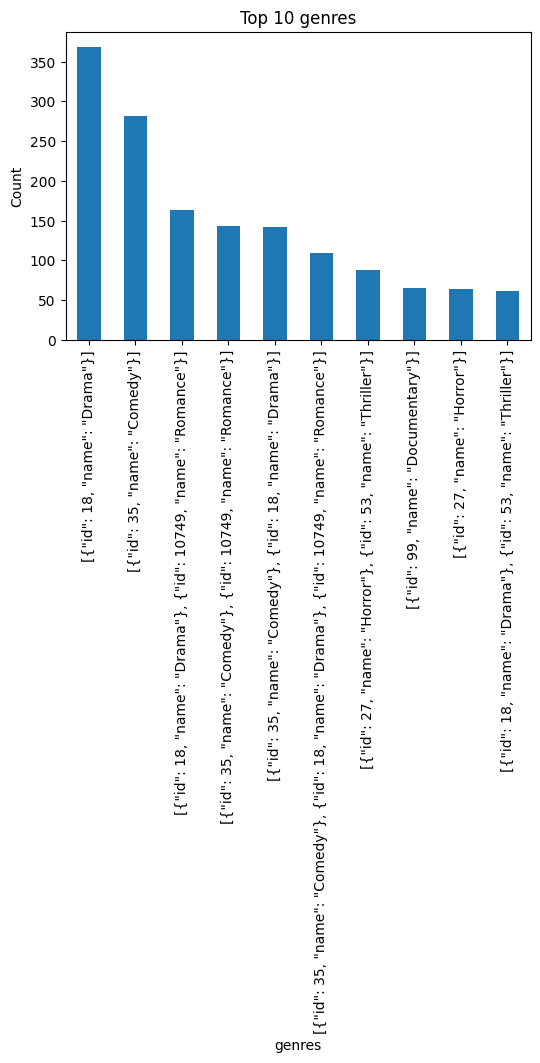

Value counts for 'original_language':
original_language
en    4503
fr      70
es      32
zh      27
de      26
hi      19
ja      16
it      13
cn      12
ko      11
Name: count, dtype: int64


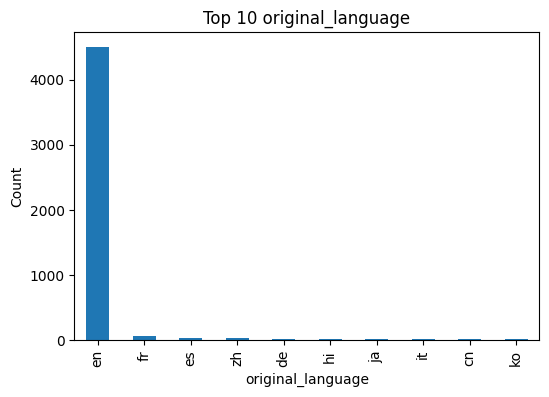

Value counts for 'spoken_languages':
spoken_languages
[{"iso_639_1": "en", "name": "English"}]                                                                          3170
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]                              127
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\u00e7ais"}]                             114
[]                                                                                                                  84
[{"iso_639_1": "es", "name": "Espa\u00f1ol"}, {"iso_639_1": "en", "name": "English"}]                               54
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "de", "name": "Deutsch"}]                                    53
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "it", "name": "Italiano"}]                                   51
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "ru", "name": "P\u0443\u0441\u0441\u043a\u0438\u0439"}]   

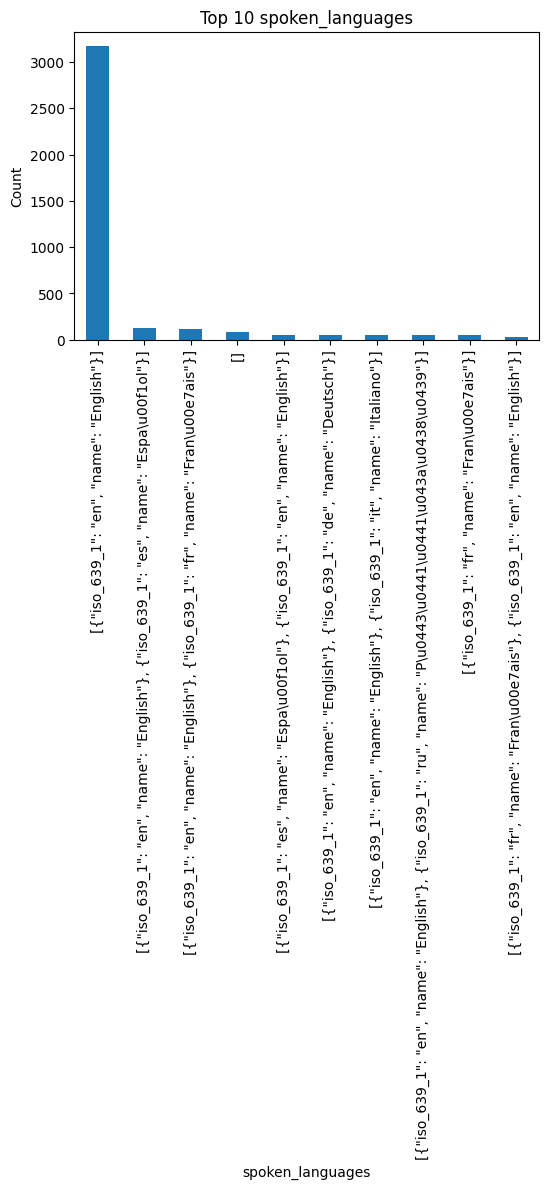

Value counts for 'keywords':
keywords
[]                                                                                       410
[{"id": 10183, "name": "independent film"}]                                               55
[{"id": 187056, "name": "woman director"}]                                                42
[{"id": 179431, "name": "duringcreditsstinger"}]                                          15
[{"id": 6075, "name": "sport"}]                                                           13
[{"id": 10183, "name": "independent film"}, {"id": 187056, "name": "woman director"}]     10
[{"id": 5565, "name": "biography"}]                                                        5
[{"id": 4344, "name": "musical"}]                                                          5
[{"id": 9937, "name": "suspense"}]                                                         5
[{"id": 4565, "name": "dystopia"}]                                                         3
Name: count, dtype: int64


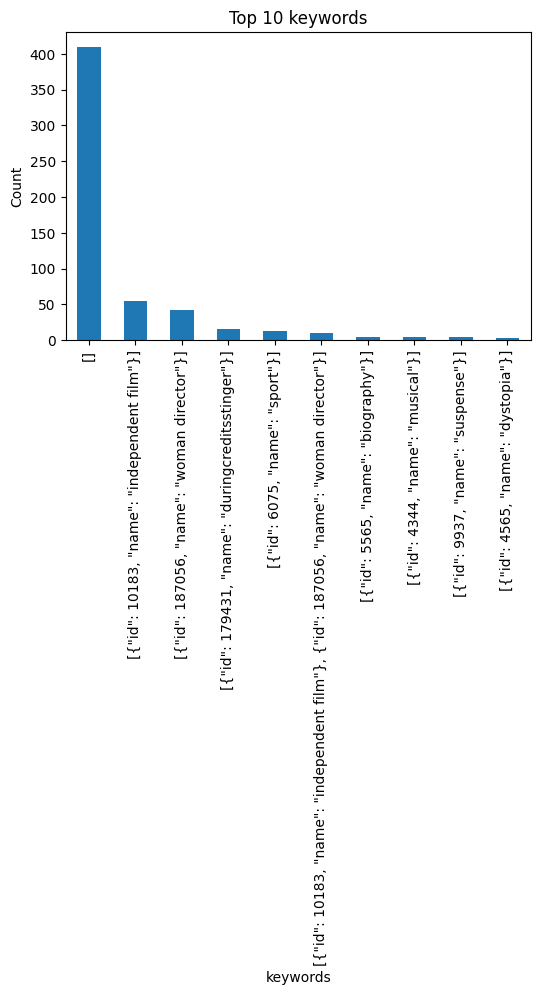

Value counts for 'production_companies':
production_companies
[]                                                                 349
[{"name": "Paramount Pictures", "id": 4}]                           58
[{"name": "Universal Pictures", "id": 33}]                          45
[{"name": "New Line Cinema", "id": 12}]                             38
[{"name": "Columbia Pictures", "id": 5}]                            37
[{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}]                 32
[{"name": "Twentieth Century Fox Film Corporation", "id": 306}]     31
[{"name": "Walt Disney Pictures", "id": 2}]                         27
[{"name": "Warner Bros.", "id": 6194}]                              27
[{"name": "Touchstone Pictures", "id": 9195}]                       26
Name: count, dtype: int64


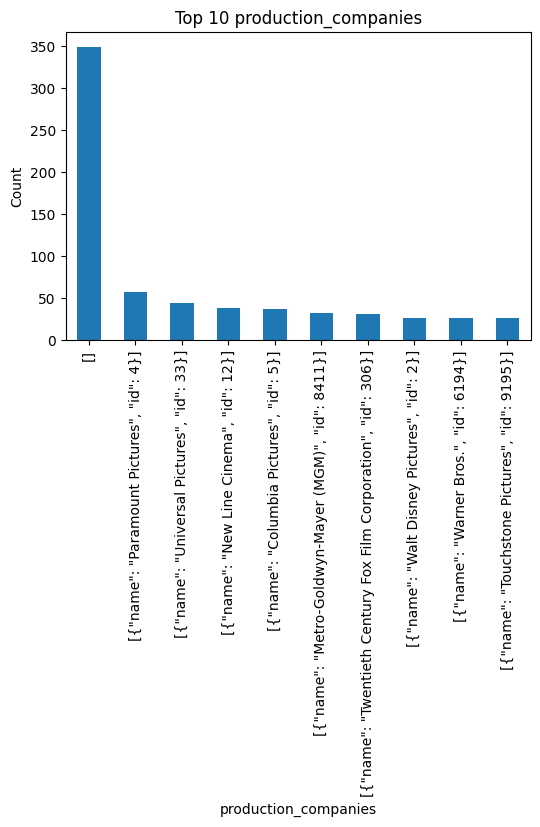

Value counts for 'production_countries':
production_countries
[{"iso_3166_1": "US", "name": "United States of America"}]                                                    2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]     181
[]                                                                                                             172
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                               130
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]            119
[{"iso_3166_1": "CA", "name": "Canada"}, {"iso_3166_1": "US", "name": "United States of America"}]              88
[{"iso_3166_1": "FR", "name": "France"}]                                                                        49
[{"iso_3166_1": "AU", "name": "Australia"}, {"iso_3166_1": "US", "name": "United States of America"}]           46
[{"iso_3166_1": "C

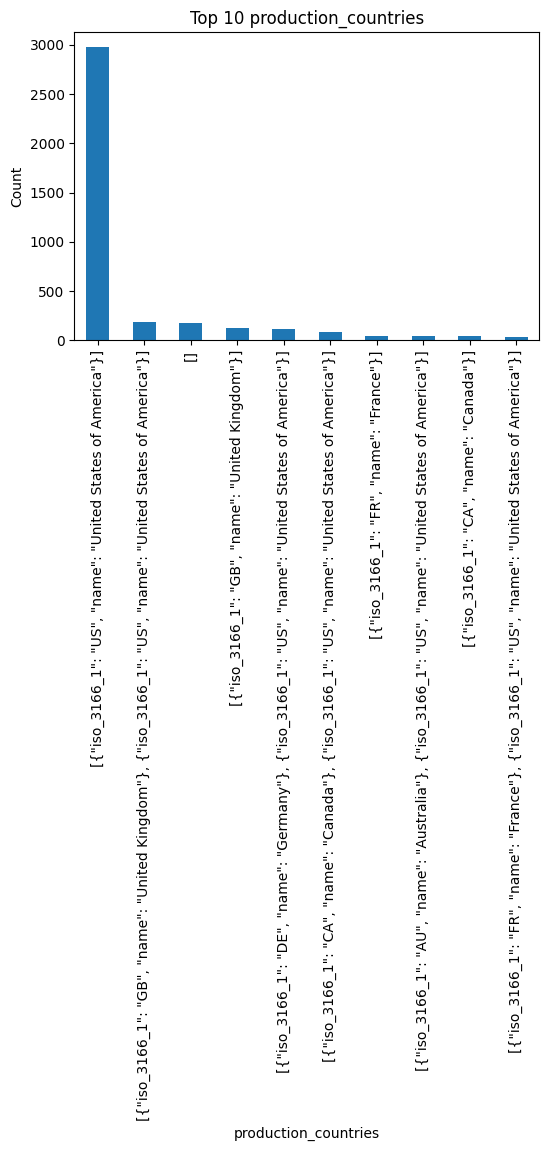

Value counts for 'status':
status
Released           4791
Rumored               5
Post Production       3
Name: count, dtype: int64


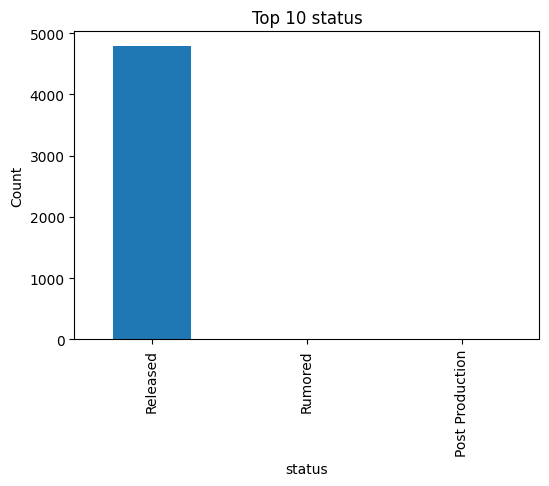

In [118]:
# Explore value counts for each categorical column individually

categorical_cols = ['genres', 'original_language', 'spoken_languages', 'keywords', 'production_companies','production_countries','status']

for col in categorical_cols:
    print(f"Value counts for '{col}':")
    #print the top 10 for each category
    top_10 = movies[col].value_counts().head(10)
    print(top_10)

    #Visualisation of the categories
    plt.figure(figsize = (6,4))
    top_10.plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

# 3.5 Numerical data

Visualisation of the distribution of numerical data from the movies dataset

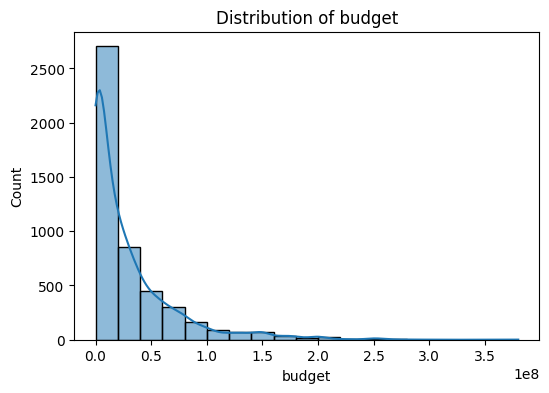

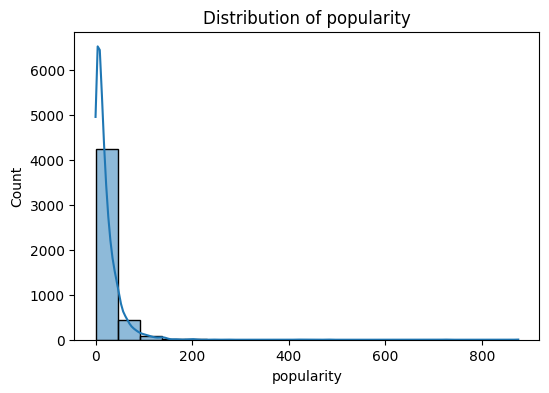

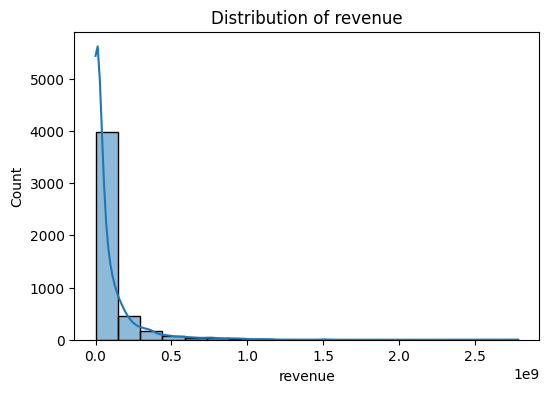

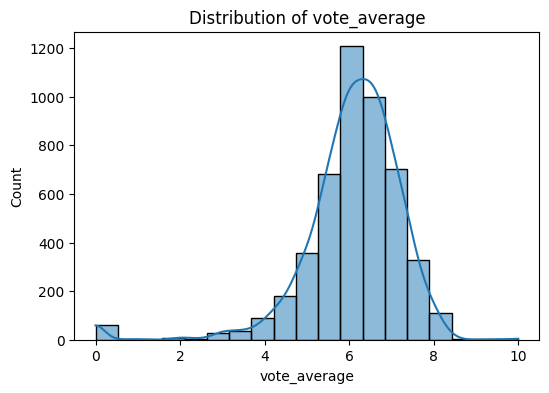

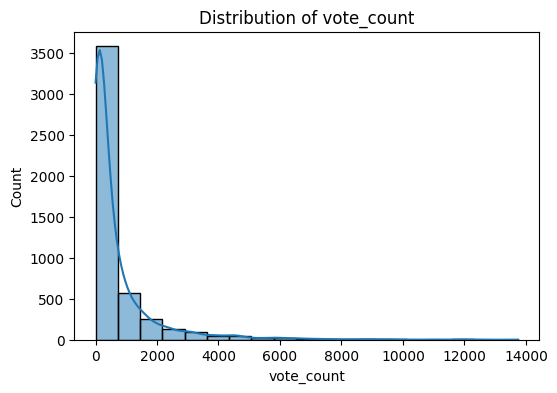

In [119]:
numerical_cols = ['budget','popularity','revenue','vote_average','vote_count']
for col in numerical_cols:
    width = 6
    height = 4
    plt.figure(figsize=(width,height))
    sns.histplot(movies[col], bins = np.linspace(min(movies[col]),max(movies[col]),20), kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

Skewed features:
budget
popularity
revenue
vote_count

I will show a box plot of the different numerical columns to see the outliers and what the median of each column is

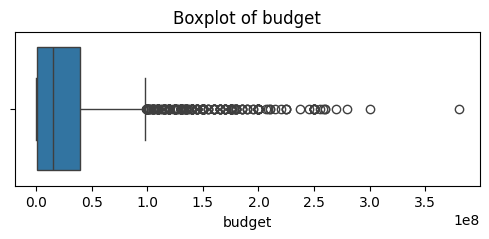

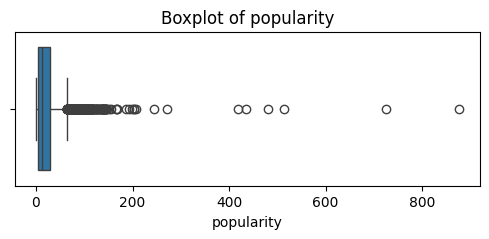

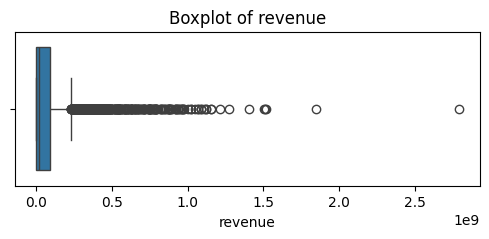

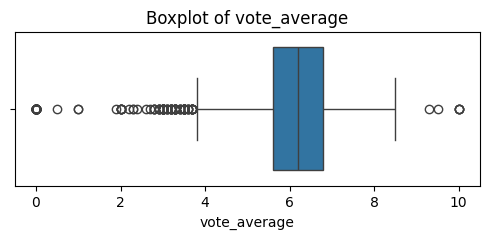

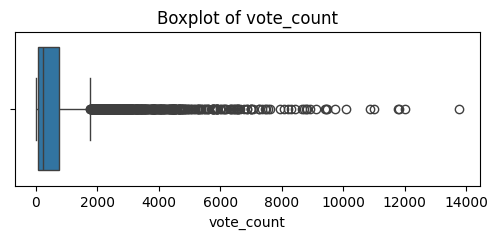

In [120]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=movies[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

A scatterplot of pairs of the features will be shown below to establish relationships

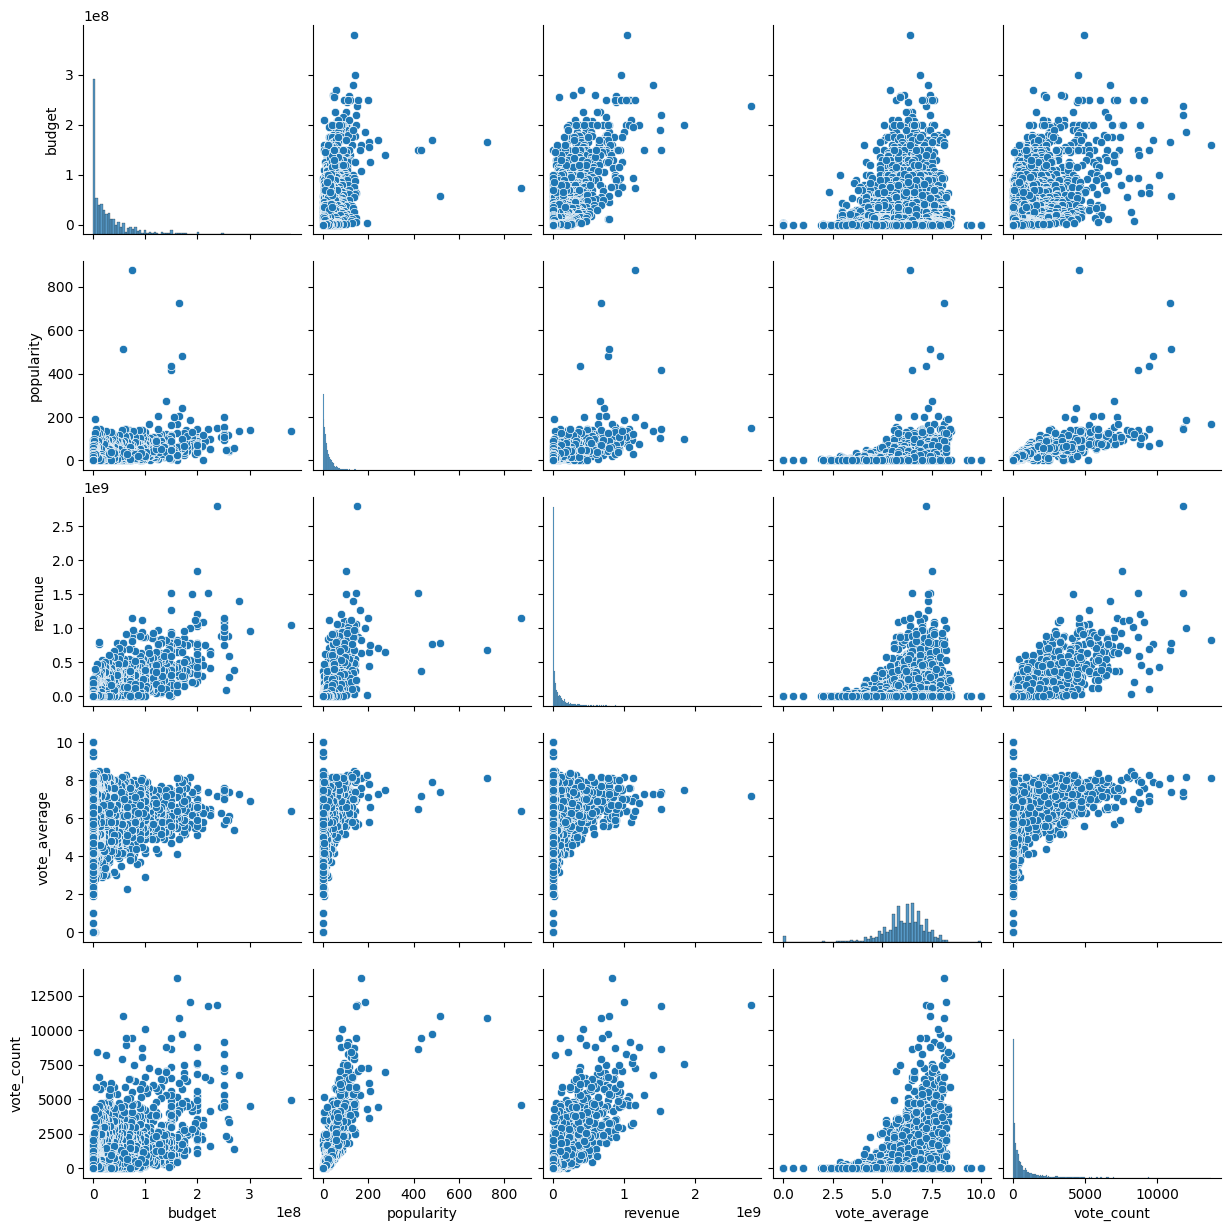

In [121]:
sns.pairplot(movies[numerical_cols])
plt.show()

As the scatterplot does show a great visualisation of all the data and how they are correlated, a correlation heatmap will provide a much faster and clearer picture of which numerical features have a high/low correlation.

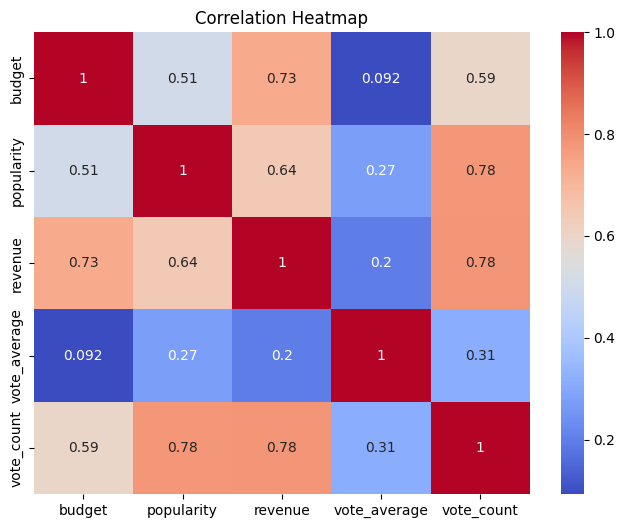

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(movies[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Removing unnecessary columns

In [123]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

We can remove the homepage, id, overview, original_title and tagline columns.
Homepage and tagline have many missing values and are also not needed for predicting movie ratings and revenue.
ID, original_title and overview are obsolete and are not needed for the modelling.

In [124]:
movies = movies.drop(columns = ['homepage','id','original_title','overview', 'tagline'])
movies.head(5)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


What we can conclude from our initial data exploration:

-**Budget and Revenue have a high correlation**
-**Popularity and Vote Count have a high correlation**
-**Revenue and Vote Count have a high correlation**


It is also worth exploring in more detail:
- Popularity and Revenue
- Budget and Vote Count

We will now delve deeper into the correlations and produce models and predictions later on 



In [125]:
movies.head(10)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman:

The skewed features from visualising the histogram were: budget, popularity, revenue and vote_count 
We need to transform these features to aid modelling later as the skewness will affect the model and may produce incorrect predictions

In [126]:
print(movies['popularity'].skew())

9.721300885675499


In [127]:
#Log-transform the skewed features
movies['log_budget'] = np.log1p(movies['budget'])
movies['log_popularity'] = np.log1p(movies['popularity'])
movies['log_revenue'] = np.log1p(movies['revenue'])
movies['log_vote_count'] = np.log1p(movies['vote_count'])


Work out the profit of each film

In [128]:
movies['profit'] = movies['revenue'] / movies['budget'].replace(0, np.nan)

Work out the popularity per vote for each film

In [129]:
movies['popularity_per_vote'] = movies['popularity'] / movies['vote_count'].replace(0, np.nan)

We also need to categorise the numerical variables:
High/Medium/Low Budget
High/Medium/Low Revenue
High/Medium/Low Popularity
High/Medium/Low Vote Count

I will create bins for each of these features

In [130]:
#budget
budget_bins = np.linspace(min(movies['budget']),max(movies['budget']),4)
#revenue
revenue_bins = np.linspace(min(movies['revenue']),max(movies['revenue']),4)
#popularity
pop_bins = np.linspace(min(movies['popularity']),max(movies['popularity']),4)
#vote count
vote_bins = np.linspace(min(movies['vote_count']),max(movies['vote_count']),4)

group_names = ['High','Medium','Low']
movies['budget'] = pd.cut(movies['budget'], budget_bins,labels = group_names, include_lowest = True)



In [131]:
movies['revenue'] = pd.cut(movies['revenue'], revenue_bins, labels=group_names, include_lowest=True)

In [132]:
movies['popularity'] = pd.cut(movies['popularity'], pop_bins, labels=group_names, include_lowest=True)

In [133]:
movies['vote_count'] = pd.cut(movies['vote_count'], vote_bins, labels=group_names, include_lowest=True)

Visualise the binning of the four features

In [134]:
movies[['budget','revenue','popularity','vote_count']]

,budget,revenue,popularity,vote_count
0,Medium,Low,High,Low
1,Low,Medium,High,High
2,Medium,High,High,High
3,Medium,Medium,High,Medium
4,Low,High,High,High
...,...,...,...,...
4798,High,High,High,High
4799,High,High,High,High
4800,High,High,High,High
4801,High,High,High,High


In [135]:
movies

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,status,title,vote_average,vote_count,log_budget,log_popularity,log_revenue,log_vote_count,profit,popularity_per_vote
0,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,High,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,Low,162.0,...,Released,Avatar,7.2,Low,19.283571,5.020174,21.748578,9.375940,11.763566,0.012749
1,Low,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,High,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,Medium,169.0,...,Released,Pirates of the Caribbean: At World's End,6.9,High,19.519293,4.942232,20.683485,8.412055,3.203333,0.030907
2,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,High,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,High,148.0,...,Released,Spectre,6.3,High,19.316769,4.685614,20.596199,8.404472,3.594590,0.024043
3,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,High,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,Medium,165.0,...,Released,The Dark Knight Rises,7.6,Medium,19.336971,4.730153,20.804790,9.116799,4.339756,0.012334
4,Low,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,High,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,High,132.0,...,Released,John Carter,6.1,High,19.376192,3.805039,19.464974,7.661527,1.092843,0.020681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,High,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,High,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,High,81.0,...,Released,El Mariachi,6.6,High,12.301387,2.725876,14.528912,5.476464,9.276909,0.059957
4799,High,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,High,[],[],2011-12-26,High,85.0,...,Released,Newlyweds,5.9,High,9.105091,0.496251,0.000000,1.791759,0.000000,0.128510
4800,High,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,High,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,High,120.0,...,Released,"Signed, Sealed, Delivered",7.0,High,0.000000,0.893831,0.000000,1.945910,NaN,0.240746
4801,High,[],[],en,High,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,High,98.0,...,Released,Shanghai Calling,5.7,High,0.000000,0.618967,0.000000,2.079442,NaN,0.122430


# Exploratory Data Analysis

In [140]:
print(movies.dtypes)

budget                  category
genres                    object
keywords                  object
original_language         object
popularity              category
production_companies      object
production_countries      object
release_date              object
revenue                 category
runtime                  float64
spoken_languages          object
status                    object
title                     object
vote_average             float64
vote_count              category
log_budget               float64
log_popularity           float64
log_revenue              float64
log_vote_count           float64
profit                   float64
popularity_per_vote      float64
dtype: object


Scatter plots for log variables

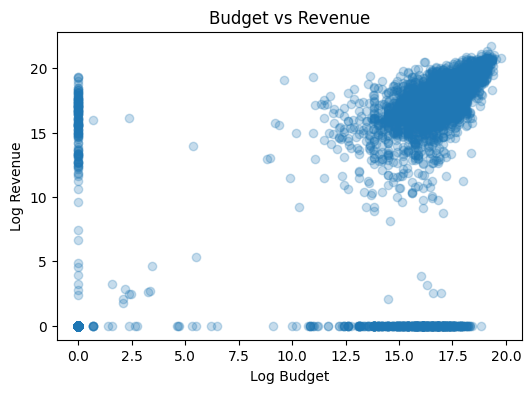

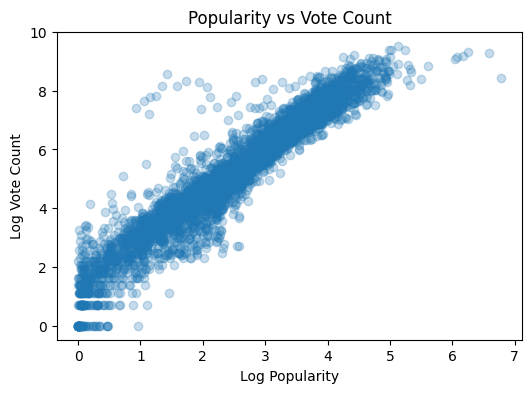

Text(0.5, 1.0, 'Revenue vs Vote Count')

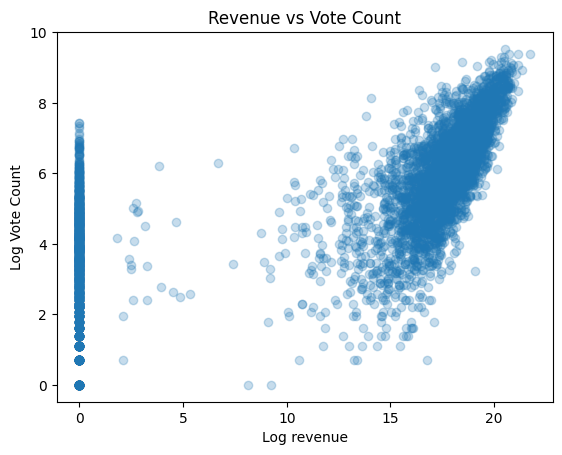

In [150]:
# Scatter plot: budget vs revenue
plt.figure(figsize=(6, 4))
plt.scatter(movies['log_budget'], movies['log_revenue'], alpha=0.25)
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.title('Budget vs Revenue')
plt.figure(figsize=(6, 4))
plt.scatter(movies['log_popularity'], movies['log_vote_count'], alpha=0.25)
plt.xlabel('Log Popularity')
plt.ylabel('Log Vote Count')
plt.title('Popularity vs Vote Count')
plt.show()
plt.scatter(movies['log_revenue'], movies['log_vote_count'], alpha=0.25)
plt.xlabel('Log revenue')
plt.ylabel('Log Vote Count')
plt.title('Revenue vs Vote Count')
